In [58]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
online = pd.read_csv('online.csv', index_col=0)
online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom
...,...,...,...,...,...,...,...,...
448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom
19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom
264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom
199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom


Assign daily acquisition cohort

Defining a cohort is the first step to cohort analysis. You will now create daily cohorts based on the day each customer has made their first transaction.

In [7]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    70864 non-null  int64  
 1   StockCode    70864 non-null  object 
 2   Description  70864 non-null  object 
 3   Quantity     70864 non-null  int64  
 4   InvoiceDate  70864 non-null  object 
 5   UnitPrice    70864 non-null  float64
 6   CustomerID   70864 non-null  int64  
 7   Country      70864 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ MB


In [8]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25
...,...,...,...,...,...,...,...,...,...
448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-08
19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-09
264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-14
199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-22


In [16]:
# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min') # this function outputs the minimum invoice day for every customer id

online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25
...,...,...,...,...,...,...,...,...,...,...
448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-08,2011-07-19
19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-09,2010-12-09
264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-14,2010-12-05
199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-22,2010-12-05


Calculate time offset in days

In [32]:
# def get_date_int(df, column):
#     year = df[column].dt.year
#     month = df[column].dt.month
#     day = df[column].dt.day
#     return year, month, day

In [33]:
# # Get the integers for date parts from the `InvoiceDay` column
# invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# invoice_year.iloc[0], invoice_month.iloc[0], invoice_day.iloc[0]

In [34]:
# # Get the integers for date parts from the `CohortDay` column
# cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

# cohort_year.iloc[0], cohort_month.iloc[0], cohort_day.iloc[0]

In [35]:
# # Calculate difference in years
# years_diff = invoice_year - cohort_year

# # Calculate difference in months
# months_diff = invoice_month - cohort_month

# # Calculate difference in days
# days_diff = invoice_day - cohort_day

# # Extract the difference in days from all previous values
# online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1

# online

In [44]:
online['CohortIndex'] = (online['InvoiceDay'] - online['CohortDay']).dt.days // 30 + 1 # difference in months (1 is the first month)
online['CohortMonth'] = online['CohortDay'].dt.strftime('%Y-%m')
online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex,CohortMonth
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,7,2011-04
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,3,2011-09
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1,2011-07
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23,1,2011-11
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25,3,2011-02
...,...,...,...,...,...,...,...,...,...,...,...,...
448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-08,2011-07-19,4,2011-07
19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-09,2010-12-09,1,2010-12
264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-14,2010-12-05,8,2010-12
199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-22,2010-12-05,6,2010-12


Calculate retention rate from scratch

In [49]:
grouping = online.groupby(['CohortMonth', 'CohortIndex']) # to get a grouping for every month of first purchase (CohortMonth) and for every number of months between the current purchase and the first purchase (CohortIndex)

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index() # to get the number of customers who made purchases in a specific month (CohortIndex) after the month of their first purchase (CohortMonth) ///// 1 (instead of 0) is when the month of the purchases is the same month when the first purchase happened

cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12,1,716
1,2010-12,2,250
2,2010-12,3,233
3,2010-12,4,255
4,2010-12,5,229
...,...,...,...
86,2011-10,2,56
87,2011-10,3,5
88,2011-11,1,291
89,2011-11,2,8


In [50]:
# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,716.0,250.0,233.0,255.0,229.0,278.0,252.0,237.0,234.0,258.0,272.0,346.0,123.0
2011-01,332.0,76.0,93.0,101.0,87.0,89.0,81.0,92.0,102.0,113.0,97.0,13.0,NaN
2011-02,316.0,67.0,69.0,86.0,62.0,80.0,78.0,78.0,90.0,78.0,10.0,NaN,NaN
2011-03,388.0,75.0,94.0,81.0,71.0,71.0,94.0,98.0,89.0,16.0,NaN,NaN,NaN
2011-04,255.0,54.0,43.0,51.0,44.0,53.0,61.0,51.0,9.0,NaN,NaN,NaN,NaN
2011-05,249.0,41.0,38.0,43.0,53.0,56.0,65.0,6.0,NaN,NaN,NaN,NaN,NaN
2011-06,207.0,29.0,30.0,39.0,53.0,52.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,173.0,24.0,34.0,39.0,41.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,139.0,28.0,36.0,25.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.349162,0.325419,0.356145,0.319832,0.388268,0.351955,0.331006,0.326816,0.360335,0.379888,0.483240,0.171788
2011-01,1.0,0.228916,0.280120,0.304217,0.262048,0.268072,0.243976,0.277108,0.307229,0.340361,0.292169,0.039157,NaN
2011-02,1.0,0.212025,0.218354,0.272152,0.196203,0.253165,0.246835,0.246835,0.284810,0.246835,0.031646,NaN,NaN
2011-03,1.0,0.193299,0.242268,0.208763,0.182990,0.182990,0.242268,0.252577,0.229381,0.041237,NaN,NaN,NaN
2011-04,1.0,0.211765,0.168627,0.200000,0.172549,0.207843,0.239216,0.200000,0.035294,NaN,NaN,NaN,NaN
2011-05,1.0,0.164659,0.152610,0.172691,0.212851,0.224900,0.261044,0.024096,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.140097,0.144928,0.188406,0.256039,0.251208,0.038647,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.138728,0.196532,0.225434,0.236994,0.005780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.201439,0.258993,0.179856,0.021583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate average price

You will now calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts.

In [52]:
# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

cohort_data

,CohortMonth,CohortIndex,UnitPrice
0,2010-12,1,3.050975
1,2010-12,2,3.054165
2,2010-12,3,2.985866
3,2010-12,4,2.766731
4,2010-12,5,2.677856
...,...,...,...
86,2011-10,2,2.666523
87,2011-10,3,2.451111
88,2011-11,1,2.460742
89,2011-11,2,3.352500


In [53]:
# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,3.050975,3.054165,2.985866,2.766731,2.677856,7.121645,2.830662,2.941124,2.675963,2.715315,2.961077,2.867489,2.478447
2011-01,3.166896,2.953681,3.035421,3.110067,3.349358,2.808876,2.522233,2.586248,2.915742,2.781656,2.353913,2.315455,NaN
2011-02,3.148814,3.347955,3.252583,2.937808,3.351729,2.890190,2.773987,2.721087,2.912892,2.687072,3.325882,NaN,NaN
2011-03,3.494565,3.837473,3.478630,2.653541,2.591851,2.371789,2.622727,2.980649,2.396575,2.900532,NaN,NaN,NaN
2011-04,3.303096,4.043529,3.403898,2.836400,2.642088,2.853647,2.725324,2.746223,2.064483,NaN,NaN,NaN,NaN
2011-05,3.102977,2.712842,2.714125,2.504951,2.215904,2.326474,2.755199,1.928421,NaN,NaN,NaN,NaN,NaN
2011-06,2.799238,1.928195,3.458487,2.670591,2.594773,2.355847,2.437187,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,3.167464,4.073308,2.556960,2.682053,2.219137,1.185000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,3.180276,3.291601,5.469866,9.091498,5.410000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Calculate the average of the quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

cohort_data

,CohortMonth,CohortIndex,Quantity
0,2010-12,1,11.405001
1,2010-12,2,11.536659
2,2010-12,3,12.059747
3,2010-12,4,13.038013
4,2010-12,5,13.973198
...,...,...,...
86,2011-10,2,7.895062
87,2011-10,3,8.055556
88,2011-11,1,7.777349
89,2011-11,2,7.600000


In [56]:
# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,11.405001,11.536659,12.059747,13.038013,13.973198,10.850761,12.050221,13.403746,12.286868,14.539115,13.019574,10.978373,12.164454
2011-01,10.542802,10.368085,10.000000,12.199667,13.596226,13.945693,20.406176,15.133132,17.646978,10.468549,11.308738,10.590909,NaN
2011-02,12.416988,10.645885,11.222222,12.876827,17.677233,14.857482,15.198238,13.533199,12.359477,18.538462,17.352941,NaN,NaN
2011-03,9.559667,13.717742,13.396146,12.062257,13.769231,14.596206,10.641414,10.825959,9.127397,10.276596,NaN,NaN,NaN
2011-04,9.941900,8.993080,16.186441,11.604000,8.883534,10.574468,8.548098,10.194245,5.672414,NaN,NaN,NaN,NaN
2011-05,13.898188,12.257895,12.018750,11.843137,10.599398,8.250000,9.177719,13.947368,NaN,NaN,NaN,NaN,NaN
2011-06,10.980245,19.699248,12.296053,11.464135,10.238636,7.811456,9.156250,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,11.135974,9.569231,6.519824,9.806084,5.870620,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,9.655863,5.025522,6.705193,5.716612,9.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


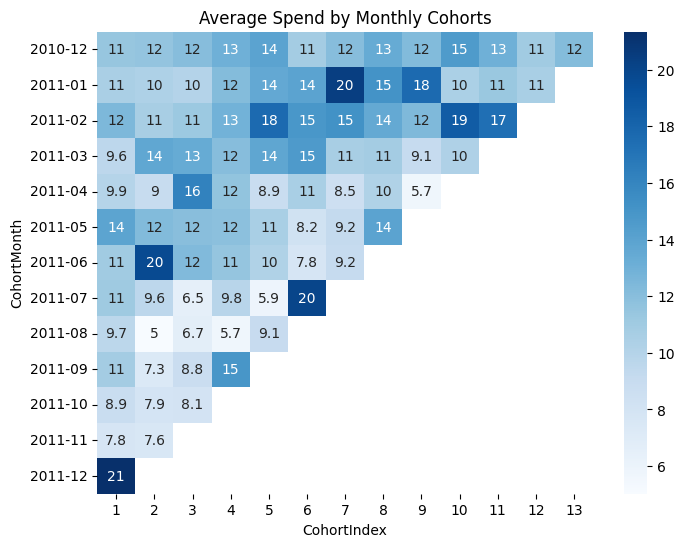

In [59]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_quantity, annot=True, cmap='Blues')
plt.show()